In [1]:
# Importar las librerías necesarias
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para cálculos matemáticos y estadísticos
import matplotlib.pyplot as plt  # Para crear gráficos estáticos
import seaborn as sns  # Para gráficos con mejor estilo
from scipy.stats import zscore  # Para calcular Z-scores (detección de anomalías)

# Configuración para que los gráficos se vean en el notebook
%matplotlib inline

# Establecer un estilo predeterminado para los gráficos con Seaborn
sns.set(style="whitegrid")

In [2]:
# Cargar el archivo CSV que contiene las lecturas de los sensores
df = pd.read_csv("sensores_maquina.csv")

# Mostrar las primeras filas del dataframe para verificar el contenido
print("Primeras filas del dataset:")
print(df.head())

# Verificar los tipos de datos de las columnas para asegurarnos de que sean correctos
print("\nTipos de datos:")
print(df.dtypes)

# Convertir la columna 'timestamp' a tipo datetime para facilitar el análisis temporal
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Establecer 'timestamp' como índice para análisis basados en el tiempo
df.set_index('timestamp', inplace=True)

# Mostrar un resumen estadístico básico de los datos
print("\nEstadísticas descriptivas:")
print(df.describe())


Primeras filas del dataset:
             timestamp  temperatura  presion  vibracion
0  2025-01-01 08:00:00         40.5    101.3       0.02
1  2025-01-01 08:01:00         40.8    101.5       0.03
2  2025-01-01 08:02:00         41.0    101.7       0.03
3  2025-01-01 08:03:00         41.3    102.1       0.05
4  2025-01-01 08:04:00         41.6    102.3       0.04

Tipos de datos:
timestamp       object
temperatura    float64
presion        float64
vibracion      float64
dtype: object

Estadísticas descriptivas:
       temperatura     presion  vibracion
count     6.000000    6.000000   6.000000
mean     41.200000  101.950000   0.040000
std       0.547723    0.557674   0.017889
min      40.500000  101.300000   0.020000
25%      40.850000  101.550000   0.030000
50%      41.150000  101.900000   0.035000
75%      41.525000  102.250000   0.047500
max      42.000000  102.800000   0.070000


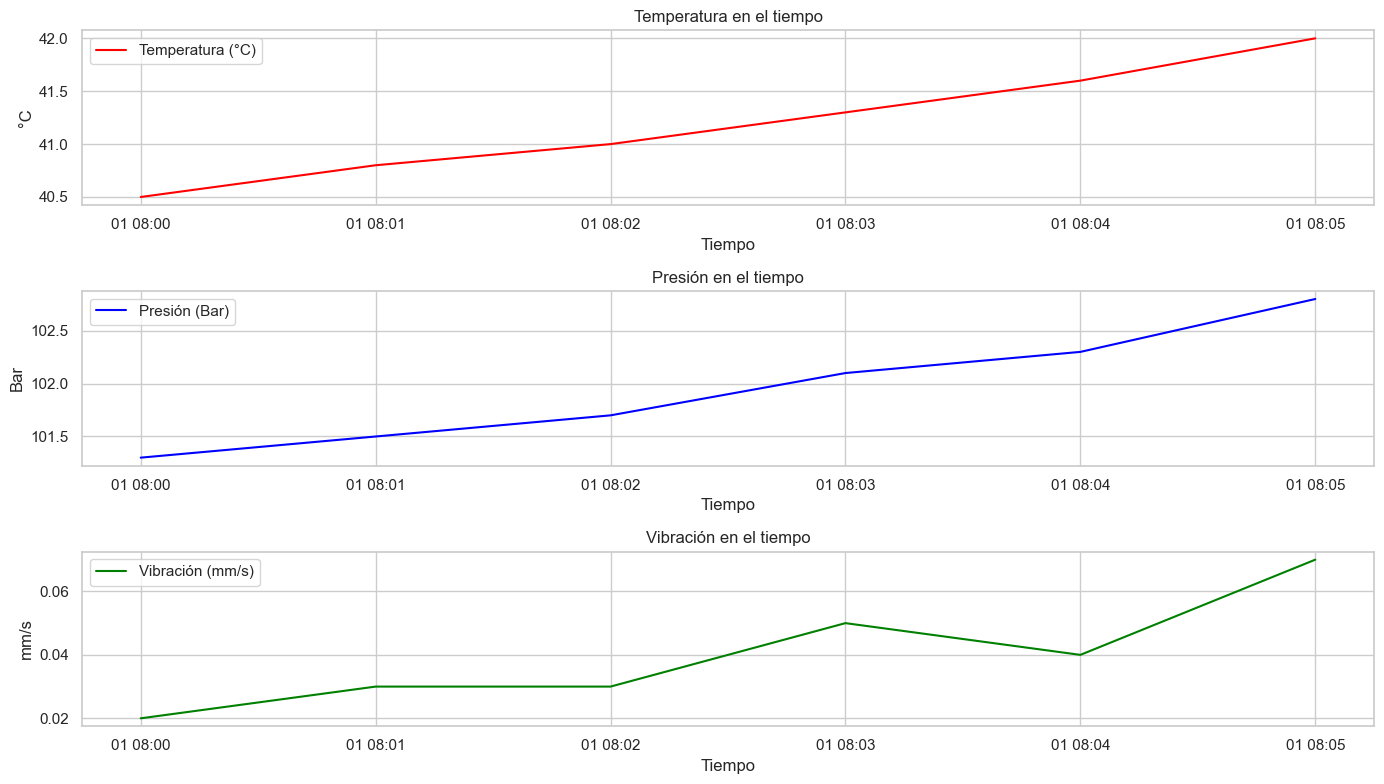

In [3]:
# Crear una figura con múltiples gráficos para cada sensor
plt.figure(figsize=(14, 8))

# Gráfico de temperatura
plt.subplot(3, 1, 1)
plt.plot(df.index, df['temperatura'], color='red', label='Temperatura (°C)')
plt.title('Temperatura en el tiempo')
plt.xlabel('Tiempo')
plt.ylabel('°C')
plt.legend()

# Gráfico de presión
plt.subplot(3, 1, 2)
plt.plot(df.index, df['presion'], color='blue', label='Presión (Bar)')
plt.title('Presión en el tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Bar')
plt.legend()

# Gráfico de vibración
plt.subplot(3, 1, 3)
plt.plot(df.index, df['vibracion'], color='green', label='Vibración (mm/s)')
plt.title('Vibración en el tiempo')
plt.xlabel('Tiempo')
plt.ylabel('mm/s')
plt.legend()

# Ajustar la disposición de los gráficos
plt.tight_layout()
plt.show()


In [4]:
# Calcular los Z-scores para cada columna (temperatura, presión, vibración)
df['z_temp'] = zscore(df['temperatura'])  # Z-scores de la temperatura
df['z_presion'] = zscore(df['presion'])  # Z-scores de la presión
df['z_vibracion'] = zscore(df['vibracion'])  # Z-scores de la vibración

# Definir un umbral para detectar anomalías (ej., valores absolutos > 2)
anomalias_temp = df[np.abs(df['z_temp']) > 2]
anomalias_presion = df[np.abs(df['z_presion']) > 2]
anomalias_vibracion = df[np.abs(df['z_vibracion']) > 2]

# Mostrar las anomalías detectadas
print("\nAnomalías en la temperatura:")
print(anomalias_temp)

print("\nAnomalías en la presión:")
print(anomalias_presion)

print("\nAnomalías en la vibración:")
print(anomalias_vibracion)



Anomalías en la temperatura:
Empty DataFrame
Columns: [temperatura, presion, vibracion, z_temp, z_presion, z_vibracion]
Index: []

Anomalías en la presión:
Empty DataFrame
Columns: [temperatura, presion, vibracion, z_temp, z_presion, z_vibracion]
Index: []

Anomalías en la vibración:
Empty DataFrame
Columns: [temperatura, presion, vibracion, z_temp, z_presion, z_vibracion]
Index: []


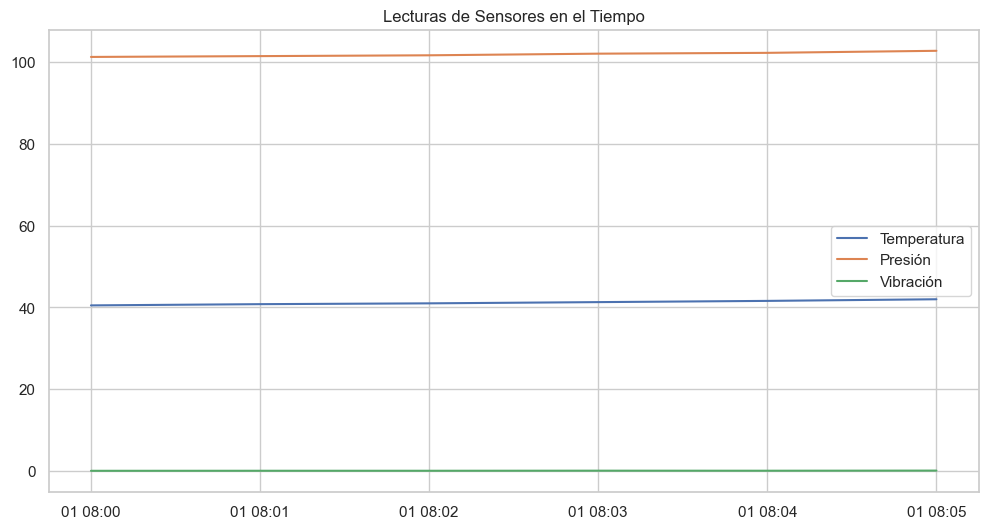

Anomalías en temperatura:
Empty DataFrame
Columns: [temperatura, presion, vibracion, z_temperatura]
Index: []
Anomalías en presion:
Empty DataFrame
Columns: [temperatura, presion, vibracion, z_temperatura, z_presion]
Index: []
Anomalías en vibracion:
Empty DataFrame
Columns: [temperatura, presion, vibracion, z_temperatura, z_presion, z_vibracion]
Index: []


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Función principal para realizar el análisis
def analizar_datos(file_path):
    # Cargar los datos
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    # Visualización de los datos
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['temperatura'], label='Temperatura')
    plt.plot(df.index, df['presion'], label='Presión')
    plt.plot(df.index, df['vibracion'], label='Vibración')
    plt.legend()
    plt.title('Lecturas de Sensores en el Tiempo')
    plt.show()

    # Detectar anomalías
    for col in ['temperatura', 'presion', 'vibracion']:
        df[f'z_{col}'] = zscore(df[col])
        print(f"Anomalías en {col}:")
        print(df[np.abs(df[f'z_{col}']) > 2])
    
    return df

if __name__ == "__main__":
    analizar_datos("sensores_maquina.csv")
